# Pre-visualization

## Load

In [3]:
#install.packages.2 <- function (pkg) if (!require(pkg)) install.packages(pkg);
#install.packages.2('devtools')
#devtools::install_github('talgalili/dendextend', force=TRUE)
library(dendextend)


---------------------
Welcome to dendextend version 1.7.0
Type citation('dendextend') for how to cite the package.

Type browseVignettes(package = 'dendextend') for the package vignette.
The github page is: https://github.com/talgalili/dendextend/

Suggestions and bug-reports can be submitted at: https://github.com/talgalili/dendextend/issues
Or contact: <tal.galili@gmail.com>

	To suppress this message use:  suppressPackageStartupMessages(library(dendextend))
---------------------


Attaching package: ‘dendextend’

The following object is masked from ‘package:stats’:

    cutree



In [4]:
#source("http://bioconductor.org/biocLite.R") 
#biocLite(c("AnnotationDbi", "impute", "GO.db", "preprocessCore")) 
#install.packages("WGCNA")
library(WGCNA)
allowWGCNAThreads()
options(stringsAsFactors = FALSE)

Loading required package: dynamicTreeCut
Loading required package: fastcluster

Attaching package: ‘fastcluster’

The following object is masked from ‘package:stats’:

    hclust




*
*  Package WGCNA 1.63 loaded.
*
*    Important note: It appears that your system supports multi-threading,
*    but it is not enabled within WGCNA in R. 
*    To allow multi-threading within WGCNA with all available cores, use 
*
*          allowWGCNAThreads()
*
*    within R. Use disableWGCNAThreads() to disable threading if necessary.
*    Alternatively, set the following environment variable on your system:
*
*          ALLOW_WGCNA_THREADS=<number_of_processors>
*
*    for example 
*
*          ALLOW_WGCNA_THREADS=4
*
*    To set the environment variable in linux bash shell, type 
*
*           export ALLOW_WGCNA_THREADS=4
*
*     before running R. Other operating systems or shells will
*     have a similar command to achieve the same aim.
*





Attaching package: ‘WGCNA’

The following object is masked from ‘package:stats’:

    cor



Allowing multi-threading with up to 4 threads.


In [63]:
library('igraph')


Attaching package: ‘igraph’

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union



In [79]:
install.packages('RColorBrewer')
library('RColorBrewer')

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [1]:
load("norm_counts.RData")

In [2]:
head(norm_counts)

,GF_104w_F_1_2,GF_104w_F_2_2,GF_104w_F_3_2,GF_104w_M_1_2,GF_104w_M_2_2,GF_52w_M_1_2,GF_52w_M_2_2,GF_52w_M_3_2,GF_52w_M_4_2,GF_8w_M_1_2,⋯,SPF_104w_M_14_2,SPF_8w_F_1_2,SPF_8w_F_3_2,SPF_8w_F_4_2,SPF_8w_F_5_2,GF_8w_F_1_2,GF_8w_F_2_2,GF_8w_F_3_2,GF_8w_F_4_2,GF_8w_F_5_2
0610005C13Rik,0.0000,0.00000,0.0000,1.768593,1.259244,0.8418979,4.942785,5.603216,7.231584,8.47277,⋯,5.28524,3.500355,2.112002,2.602398,0.00000,18.24998,0.00000,2.025447,5.268672,0.00000
Erg28,868.4015,749.64927,910.3535,886.064952,992.913601,508.5063502,530.855142,514.375197,738.344705,603.98749,⋯,692.36648,763.077332,744.480801,908.237050,957.79030,898.54336,682.26034,612.697796,593.252445,809.27852
0610009B22Rik,1021.3276,1169.19730,1180.9991,1224.750457,1558.313990,1038.9020466,876.850113,1016.423320,877.914273,948.95029,⋯,1206.79653,1268.295198,1164.769254,1295.994415,1446.89758,1040.24912,1020.67017,1142.352254,959.952003,1094.00091
0610009L18Rik,28.2185,36.20465,18.2253,20.338816,38.406931,31.9921214,26.691041,22.412863,4.338950,61.73018,⋯,45.80542,42.004257,45.408049,102.794738,72.02239,48.30878,19.58642,11.139960,45.310578,24.36813
0610009O20Rik,217.5555,278.98879,266.0893,226.379868,271.996624,299.7156634,349.949200,395.587025,309.511786,360.69794,⋯,178.81730,274.194454,252.384272,227.709862,184.89330,231.88216,158.86764,271.409933,304.529230,269.33199
0610010B08Rik,0.0000,0.00000,0.0000,0.000000,0.000000,0.0000000,0.000000,0.000000,0.000000,0.00000,⋯,0.00000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.000000,0.000000,0.00000


## Sample clustering

In [6]:
col_order = colnames(norm_counts)
col_order_metadata = t(sapply(sapply(col_order, strsplit, split = "_"), unlist))
col_order_metadata = col_order_metadata[,c(-4,-5)]
colnames(col_order_metadata) = c("type", "age", "gender")
colors = cbind(col_order_metadata[,3],col_order_metadata[,2],col_order_metadata[,1])
color_SPF = rgb(204,85,79, maxColorValue=255)
color_GF = rgb(107,140,206, maxColorValue=255)
color_104w = rgb(143,98,202, maxColorValue=255)
color_52w = rgb(193,136,63, maxColorValue=255)
color_8w = rgb(74,171,131, maxColorValue=255)
color_F = rgb(126,163,66, maxColorValue=255)
color_M = rgb(199,93,156, maxColorValue=255)
colors[,3] = replace(colors[,3],colors[,3] == "SPF", color_SPF)
colors[,3] = replace(colors[,3],colors[,3] == "GF", color_GF)
colors[,2] = replace(colors[,2],colors[,2] == "104w",color_104w)
colors[,2] = replace(colors[,2],colors[,2] == "52w",color_52w)
colors[,2] = replace(colors[,2],colors[,2] == "8w",color_8w)
colors[,1] = replace(colors[,1],colors[,1] == "F",color_F)
colors[,1] = replace(colors[,1],colors[,1] == "M",color_M)

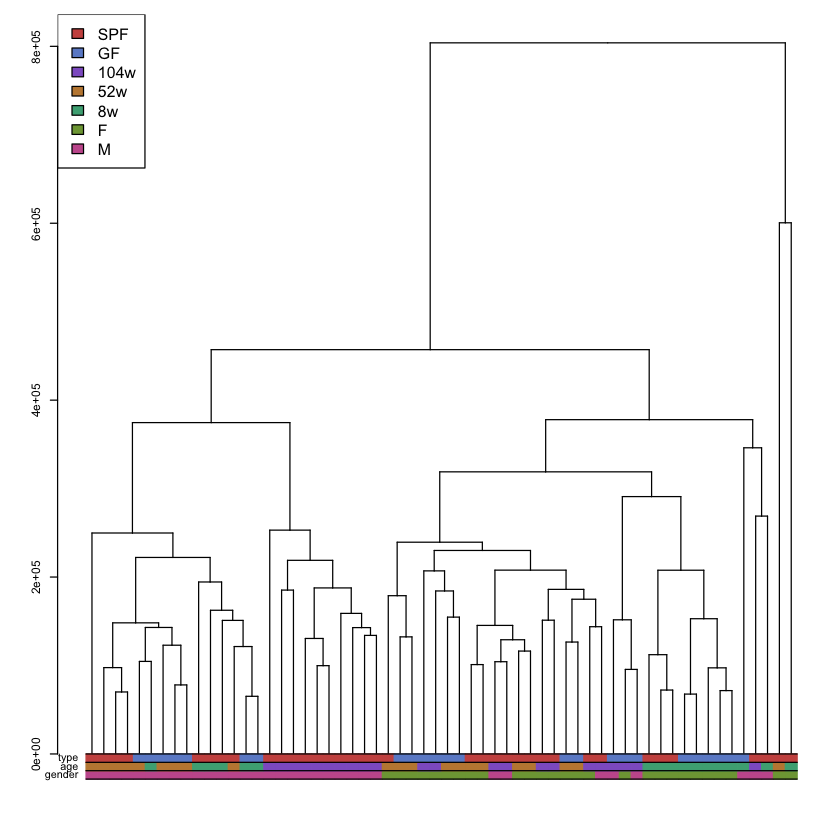

In [7]:
sampleTree = as.dendrogram(hclust(dist(t(norm_counts)), method = "average"))
par(mar = c(4,4,1,1))
par(cex = 0.6)
plot(sampleTree, leaflab="none")
colored_bars(colors, sampleTree, rowLabels = c("gender", "age","type"),y_shift=0.5)
legend("topleft",
        fill=c(color_SPF,color_GF,color_104w,color_52w,color_8w,color_F,color_M),
        c("SPF","GF","104w","52w","8w","F","M"),
        cex=0.8)

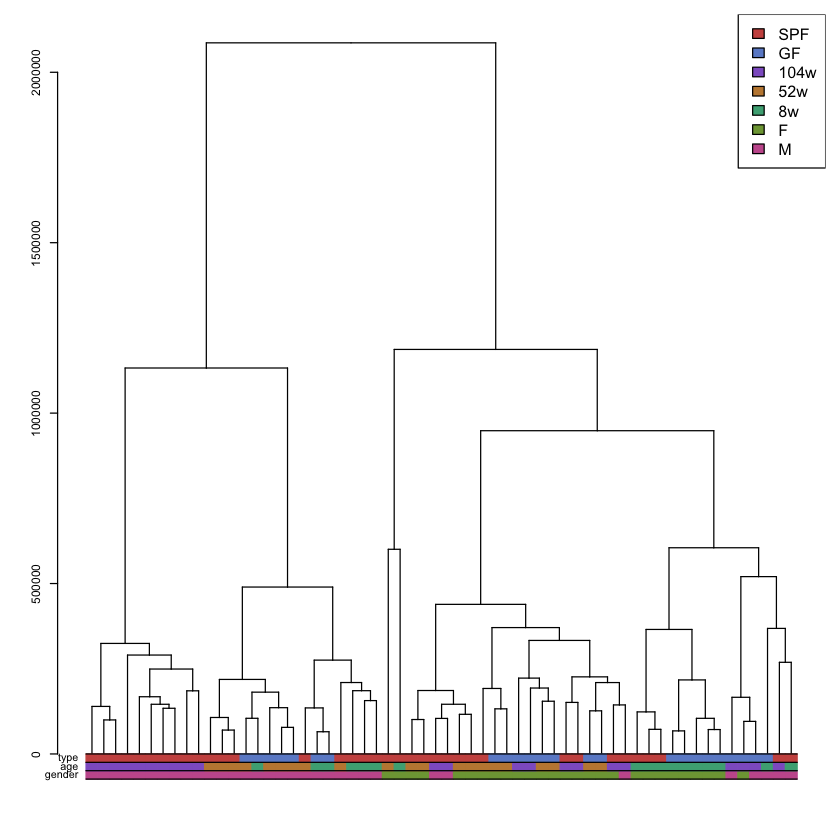

In [8]:
sampleTree = as.dendrogram(hclust(dist(t(norm_counts)), method = "ward.D2"))
par(mar = c(4,4,1,1))
par(cex = 0.6)
plot(sampleTree, leaflab="none")
colored_bars(colors, sampleTree, rowLabels = c("gender", "age","type"),y_shift=0.5)
legend("topright",
        fill=c(color_SPF,color_GF,color_104w,color_52w,color_8w,color_F,color_M),
        c("SPF","GF","104w","52w","8w","F","M"),
        cex=0.8)

## Gene network

In [14]:
# Filter genes that have a count > 10 in more than 90% of the samples
dim(norm_counts)
to_keep = rownames(norm_counts)[which(rowSums(norm_counts > 10)>0.9*dim(norm_counts)[2])]
filtered_norm_couts = norm_counts[to_keep,]
dim(filtered_norm_couts)

[1] 24421    60

[1] 10219    60

pickSoftThreshold: will use block size 4378.
 pickSoftThreshold: calculating connectivity for given powers...
   ..working on genes 1 through 4378 of 10219
   ..working on genes 4379 through 8756 of 10219
   ..working on genes 8757 through 10219 of 10219
   Power SFT.R.sq  slope truncated.R.sq  mean.k. median.k.  max.k.
1      2    0.144 -0.617          0.901 644.0000  6.20e+02 1390.00
2      4    0.691 -1.460          0.964 114.0000  9.21e+01  438.00
3      6    0.783 -1.840          0.970  31.1000  1.94e+01  198.00
4      8    0.790 -2.020          0.962  11.0000  5.03e+00  106.00
5     10    0.832 -1.990          0.985   4.6100  1.49e+00   63.10
6     12    0.851 -1.960          0.988   2.1900  4.90e-01   40.10
7     14    0.876 -1.890          0.988   1.1500  1.72e-01   26.70
8     16    0.886 -1.820          0.971   0.6430  6.43e-02   18.40
9     18    0.899 -1.780          0.970   0.3830  2.50e-02   13.60
10    20    0.882 -1.770          0.946   0.2400  1.02e-02   10.40
11    22

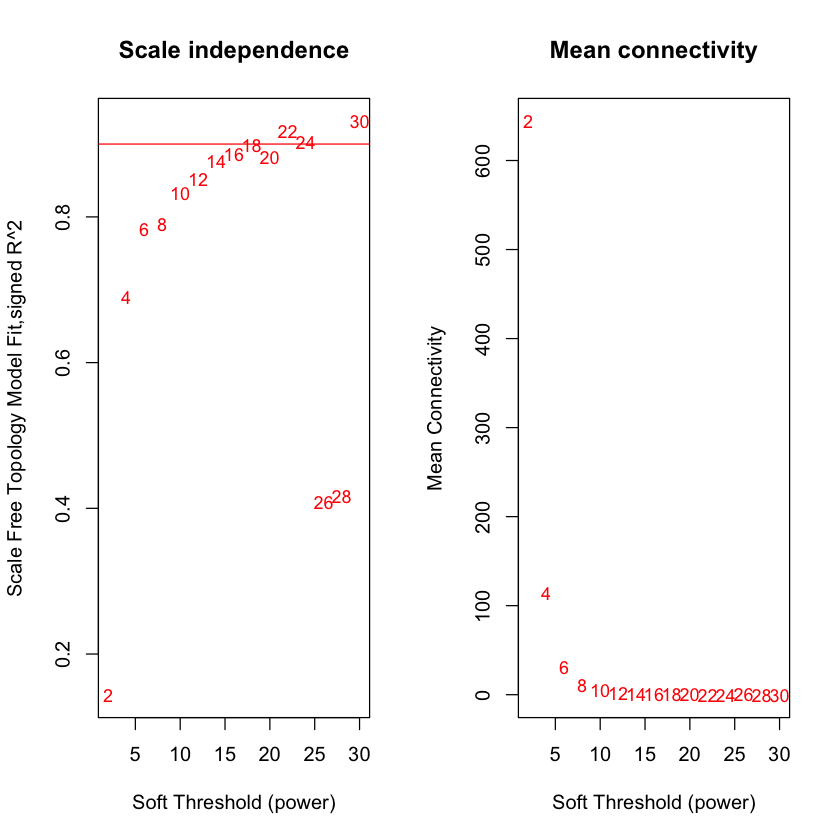

In [17]:
# Choosing the soft-thresholding power
powers = seq(from = 2, to=30, by=2)
sft = pickSoftThreshold(t(filtered_norm_couts), powerVector = powers, verbose = 5)
par(mfrow = c(1,2))
cex1 = 0.9
# Scale-free topology fit index as a function of the soft-thresholding power
plot(sft$fitIndices[,1],
     -sign(sft$fitIndices[,3])*sft$fitIndices[,2],
     xlab="Soft Threshold (power)",
     ylab="Scale Free Topology Model Fit,signed R^2",
     type="n",
     main = paste("Scale independence"))
text(sft$fitIndices[,1],
     -sign(sft$fitIndices[,3])*sft$fitIndices[,2],
     labels=powers,
     cex=cex1,
     col="red");
# this line corresponds to using an R^2 cut-off of h
abline(h=0.90,col="red")
# Mean connectivity as a function of the soft-thresholding power
plot(sft$fitIndices[,1],
     sft$fitIndices[,5],
     xlab="Soft Threshold (power)",
     ylab="Mean Connectivity",
     type="n",
     main = paste("Mean connectivity"))
text(sft$fitIndices[,1], sft$fitIndices[,5], labels=powers, cex=cex1,col="red")

Parameters for network construction
- Soft-thresholding power parameter: 18
- Minimum module size: 20
- Height for module merging: 0.15 (below)

In [48]:
soft_thresholding_power = 18

In [33]:
# Block-wise network construction and module detection
bwnet = blockwiseModules(t(filtered_norm_couts),
                 checkMissingData = TRUE,
                 maxBlockSize = 5000,
                 power = soft_thresholding_power,
                 TOMType = "unsigned",
                 numericLabels = TRUE,
                 saveTOMs = TRUE,
                 saveTOMFileBase = "norm_genes_TOM",
                 mergeCutHeight = 0.15, 
                 verbose=3)

 Calculating module eigengenes block-wise from all genes
   Flagging genes and samples with too many missing values...
    ..step 1
 ....pre-clustering genes to determine blocks..
   Projective K-means:
   ..k-means clustering..
   ..merging smaller clusters...
Block sizes:
gBlocks
   1    2    3 
4997 4015 1207 
 ..Working on block 1 .
    TOM calculation: adjacency..
    ..will use 4 parallel threads.
     Fraction of slow calculations: 0.000000
    ..connectivity..
    ..matrix multiplication (system BLAS)..
    ..normalization..
    ..done.
   ..saving TOM for block 1 into file norm_genes_TOM-block.1.RData
 ....clustering..
 ....detecting modules..
 ....calculating module eigengenes..
 ....checking kME in modules..
 ..Working on block 2 .
    TOM calculation: adjacency..
    ..will use 4 parallel threads.
     Fraction of slow calculations: 0.000000
    ..connectivity..
    ..matrix multiplication (system BLAS)..
    ..normalization..
    ..done.
   ..saving TOM for block 2 into fi

In [34]:
# Modules
table(bwnet$colors)


   0    1    2    3    4    5    6    7    8    9   10   11   12   13   14   15 
8951  346  214  201   94   64   57   51   45   29   29   28   26   22   21   21 
  16 
  20 

- 16 modules with between 20 and 346 genes 
- 8951 genes not assigned to a module

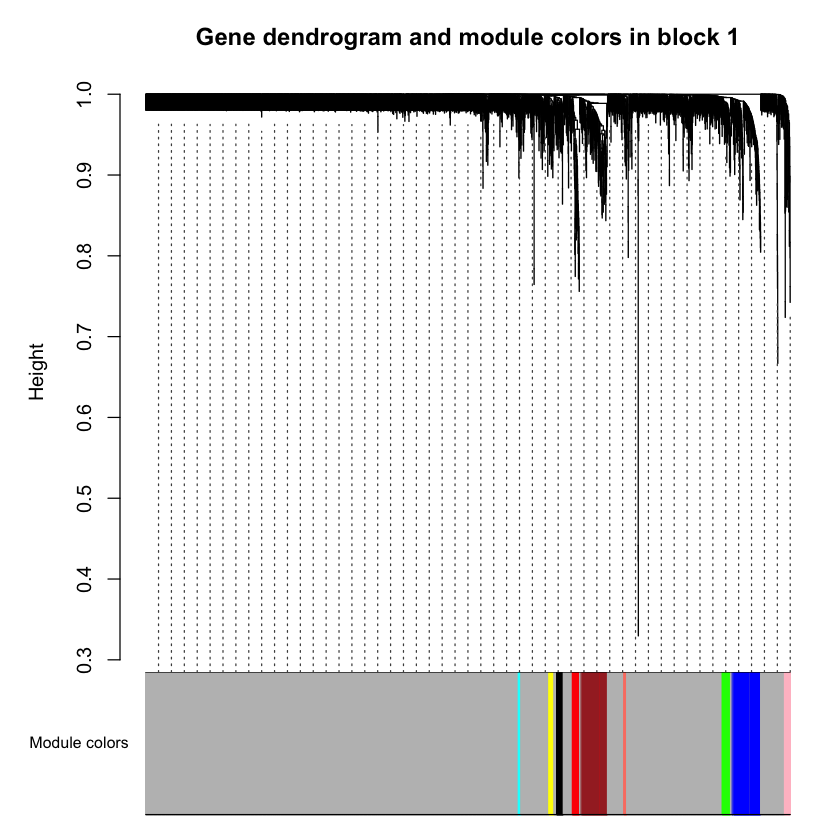

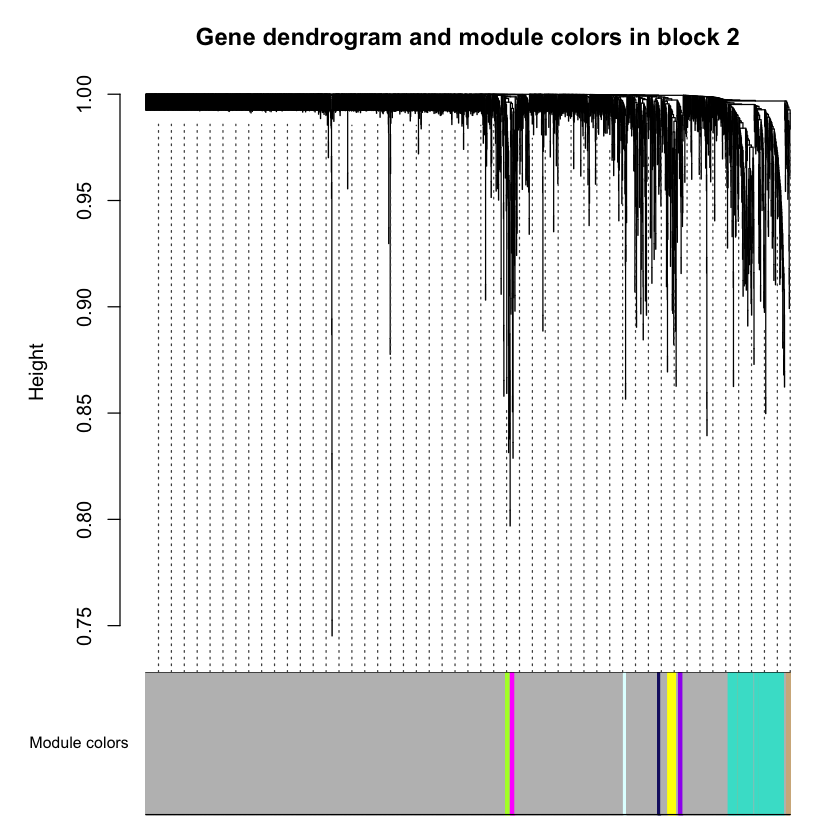

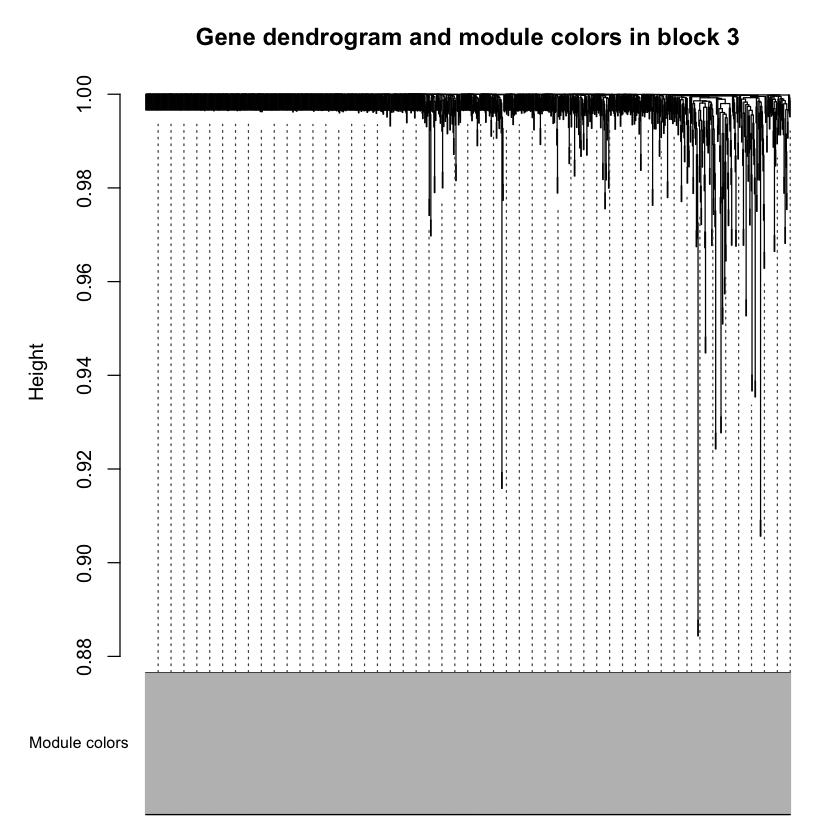

In [35]:
# Plot the dendrogram and the module colors underneath for the 3 blocks
bwModuleColors = labels2colors(bwnet$colors)
plotDendroAndColors(bwnet$dendrograms[[1]],
                    bwModuleColors[bwnet$blockGenes[[1]]],
                    "Module colors",
                    main = "Gene dendrogram and module colors in block 1",
                    dendroLabels = FALSE,
                    hang = 0.03,
                    addGuide = TRUE,
                    guideHang = 0.05)
plotDendroAndColors(bwnet$dendrograms[[2]],
                    bwModuleColors[bwnet$blockGenes[[2]]],
                    "Module colors",
                    main = "Gene dendrogram and module colors in block 2",
                    dendroLabels = FALSE,
                    hang = 0.03,
                    addGuide = TRUE,
                    guideHang = 0.05)
plotDendroAndColors(bwnet$dendrograms[[3]],
                    bwModuleColors[bwnet$blockGenes[[3]]],
                    "Module colors",
                    main = "Gene dendrogram and module colors in block 3",
                    dendroLabels = FALSE,
                    hang = 0.03,
                    addGuide = TRUE,
                    guideHang = 0.05)

In [47]:
# Get genes that are in one module
in_mod = is.finite(match(bwnet$colors, seq(1:16)))
mod_genes = rownames(filtered_norm_couts)[in_mod]
length(mod_genes)

[1] 1268

In [49]:
# Get the Topological Overlap Matrix (TOM)
TOM = TOMsimilarityFromExpr(t(filtered_norm_couts), power = soft_thresholding_power)

TOM calculation: adjacency..
..will use 4 parallel threads.
 Fraction of slow calculations: 0.000000
..connectivity..
..matrix multiplication (system BLAS)..
..normalization..
..done.


In [57]:
# Filter TOM for the genes in the modules
mod_TOM = TOM[in_mod, in_mod]
dimnames(mod_TOM) = list(mod_genes, mod_genes)

In [58]:
# Transform into adjency matrix while keeping gene connection if the value > 0.02
adjency = (as.matrix(mod_TOM)>0.02)*1
head(adjency)

,1500011K16Rik,1600020E01Rik,1700094D03Rik,1810026B05Rik,Ndufaf8,2010107E04Rik,2210016L21Rik,2310033P09Rik,Trir,2410015M20Rik,⋯,Zmat5,Zmpste24,Zmym6,Zmynd8,Znhit2,Znrd1,Znrf1,Zrsr2,Zscan26,Zswim8
1500011K16Rik,1,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
1600020E01Rik,0,1,0,1,0,0,0,0,0,0,⋯,0,0,1,0,0,0,0,0,1,0
1700094D03Rik,0,0,1,1,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
1810026B05Rik,0,1,1,1,0,0,0,0,0,0,⋯,0,0,1,0,0,0,1,0,1,0
Ndufaf8,0,0,0,0,1,0,0,0,0,1,⋯,0,0,0,0,0,0,0,0,0,0
2010107E04Rik,0,0,0,0,0,1,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [69]:
# Remove the genes only connected to themselves
connected = which(rowSums(adjency)>1)
adjency = adjency[connected,connected]
dim(adjency)
connected_genes = rownames(adjency)

[1] 1246 1246

In [64]:
# Transform adjency matrix into network
net = graph_from_incidence_matrix(adjency)

In [74]:
# Get node colors = module color
mod_colors = bwnet$colors
names(mod_colors) = rownames(filtered_norm_couts)
connected_gene_colors = mod_colors[connected_genes]

In [95]:
pal2 = rainbow(16)
pal2

[1] "#FF0000FF" "#FF6000FF" "#FFBF00FF" "#DFFF00FF" "#80FF00FF" "#20FF00FF"
 [7] "#00FF40FF" "#00FF9FFF" "#00FFFFFF" "#009FFFFF" "#0040FFFF" "#2000FFFF"
[13] "#8000FFFF" "#DF00FFFF" "#FF00BFFF" "#FF0060FF"

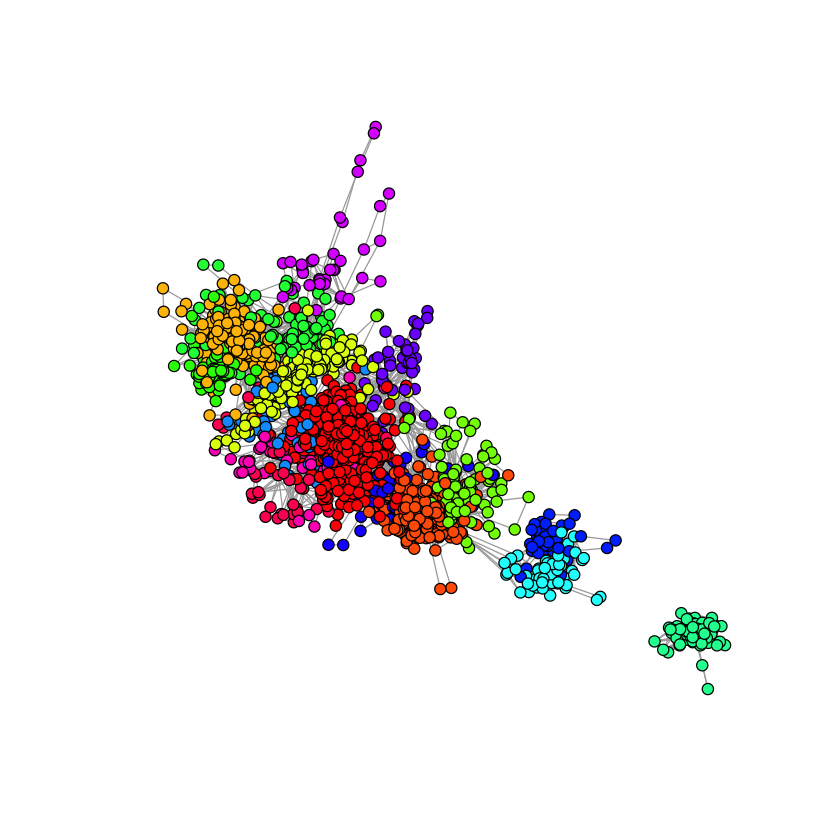

In [96]:
# Plot network
l = layout_with_fr(net)
plot(net, 
     vertex.label=NA,
     vertex.size=4,
     vertex.color=pal2[connected_gene_colors],
     layout=l)

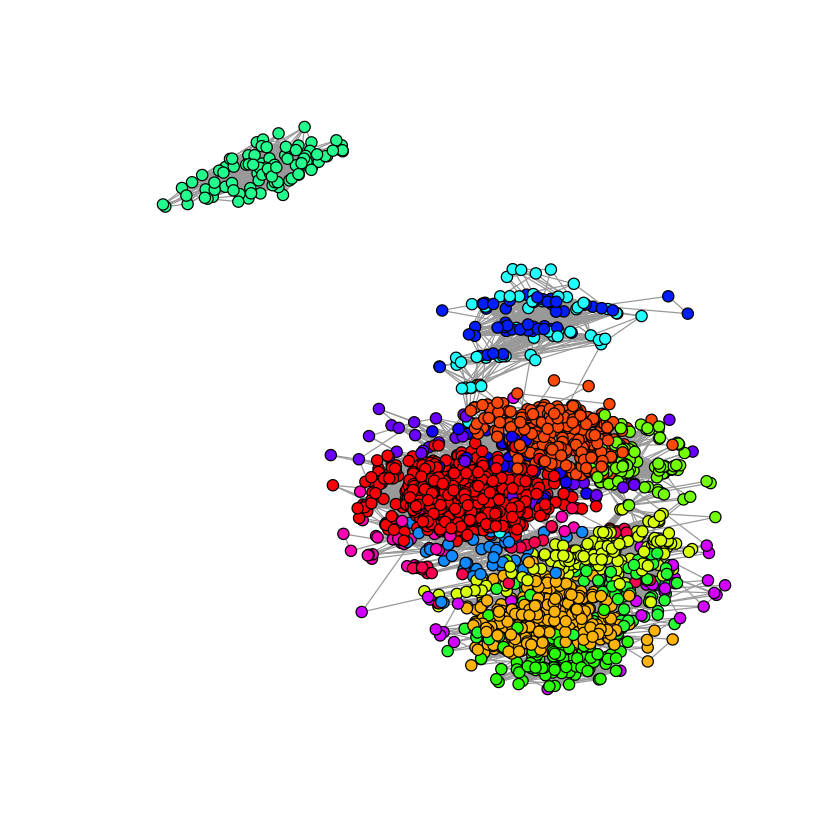

In [97]:
# Plot network
l = layout_with_kk(net)
plot(net, 
     vertex.label=NA,
     vertex.size=4,
     vertex.color=pal2[connected_gene_colors],
     layout=l)

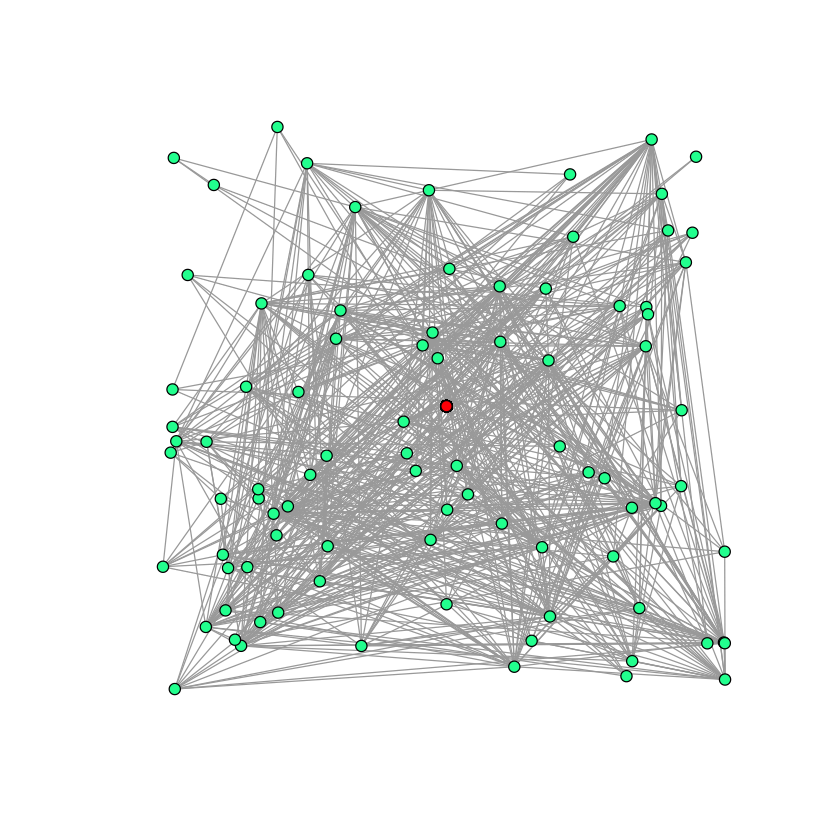

In [98]:
# Plot network
l = layout_with_lgl(net)
plot(net, 
     vertex.label=NA,
     vertex.size=4,
     vertex.color=pal2[connected_gene_colors],
     layout=l)